# 导入工具包

In [17]:
# opencv-python
import cv2

# mediapipe人工智能工具包
import mediapipe as mp

# 进度条库
from tqdm import tqdm

# 时间库
import time

# 导入python绘图matplotlib
import matplotlib.pyplot as plt

# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

In [18]:
# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 导入手部关键点检测模型

In [19]:
# 导入solution
mp_hands = mp.solutions.hands

# 导入模型
hands = mp_hands.Hands(static_image_mode=False,        # 是静态图片还是连续视频帧
                       max_num_hands=4,                # 最多检测几只手
                       min_detection_confidence=0.5,   # 置信度阈值
                       min_tracking_confidence=0.5)    # 追踪阈值

# 导入绘图函数
mpDraw = mp.solutions.drawing_utils 

# 读入图像

In [20]:
# 从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('./images/camera1.jpg')

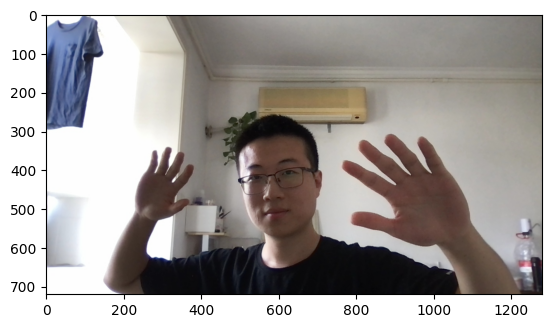

In [21]:
look_img(img)

In [22]:
# 水平镜像翻转图像，使图中左右手与真实左右手对应
# 参数 1：水平翻转，0：竖直翻转，-1：水平和竖直都翻转
img = cv2.flip(img, 1)

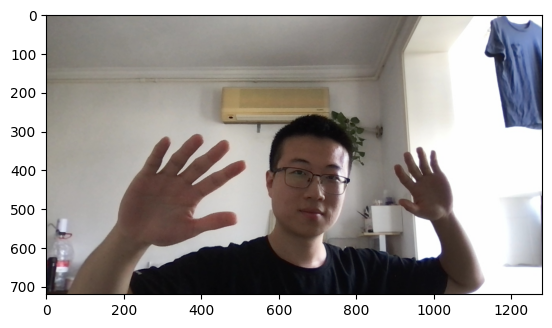

In [23]:
look_img(img)

# 将图像输入模型，获取预测结果

In [24]:
# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 将RGB图像输入模型，获取预测结果
results = hands.process(img_RGB)

In [25]:
results

mediapipe.python.solution_base.SolutionOutputs

In [26]:
# 预测出手的个数
len(results.multi_hand_landmarks)

2

# 可视化检测结果

In [27]:
if results.multi_hand_landmarks: # 如果有检测到手
    # 遍历每一只检测出的手
    for hand_idx in range(len(results.multi_hand_landmarks)):
        hand_21 = results.multi_hand_landmarks[hand_idx] # 获取该手的所有关键点坐标
        mpDraw.draw_landmarks(img, hand_21, mp_hands.HAND_CONNECTIONS) # 可视化

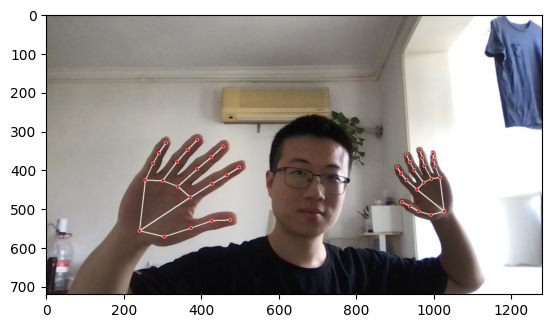

In [28]:
look_img(img)

In [29]:
# 函数参考
mpDraw.draw_landmarks?


Signature:
mpDraw.draw_landmarks(
    image: numpy.ndarray,
    landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList,
    connections: Union[List[Tuple[int, int]], NoneType] = None,
    landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
    connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2),
)
Docstring:
Draws the landmarks and the connections on the image.

Args:
  image: A three channel BGR image represented as numpy ndarray.
  landmark_list: A normalized landmark list proto message to be annotated on
    the image.
  connections: A list of landmark index tuples that specifies how landmarks to
    be connected in the dr

In [30]:
# 查看函数源码
mpDraw.draw_landmarks??

Signature:
mpDraw.draw_landmarks(
    image: numpy.ndarray,
    landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList,
    connections: Union[List[Tuple[int, int]], NoneType] = None,
    landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
    connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2),
)
Source:   
def draw_landmarks(
    image: np.ndarray,
    landmark_list: landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[DrawingSpec,
                                 Mapping[int, DrawingSpec]] = DrawingSpec(
                                     color=RED

# 整理代码

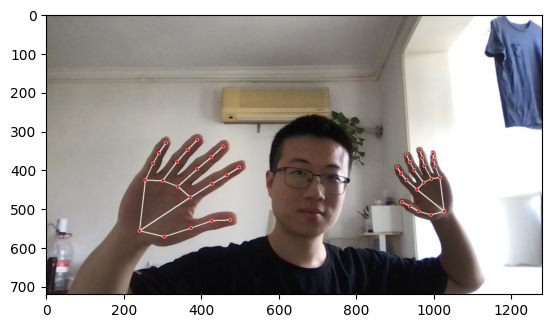

True

In [31]:
# opencv-python
import cv2
# mediapipe人工智能工具包
import mediapipe as mp
# 进度条库
from tqdm import tqdm
# 时间库
import time
# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()


# 导入solution
mp_hands = mp.solutions.hands
# 导入模型
hands = mp_hands.Hands(static_image_mode=False,        # 是静态图片还是连续视频帧
                       max_num_hands=4,                # 最多检测几只手
                       min_detection_confidence=0.5,   # 置信度阈值
                       min_tracking_confidence=0.5)    # 追踪阈值
# 导入绘图函数
mpDraw = mp.solutions.drawing_utils 

# 从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('./images/camera1.jpg')

# 水平镜像翻转图像，使图中左右手与真实左右手对应
# 参数 1：水平翻转，0：竖直翻转，-1：水平和竖直都翻转
img = cv2.flip(img, 1)
# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 将RGB图像输入模型，获取预测结果
results = hands.process(img_RGB)

if results.multi_hand_landmarks: # 如果有检测到手
    # 遍历每一只检测出的手
    for hand_idx in range(len(results.multi_hand_landmarks)):
        hand_21 = results.multi_hand_landmarks[hand_idx] # 获取该手的所有关键点坐标
        mpDraw.draw_landmarks(img, hand_21, mp_hands.HAND_CONNECTIONS) # 可视化

look_img(img)

cv2.imwrite('A.jpg',img)

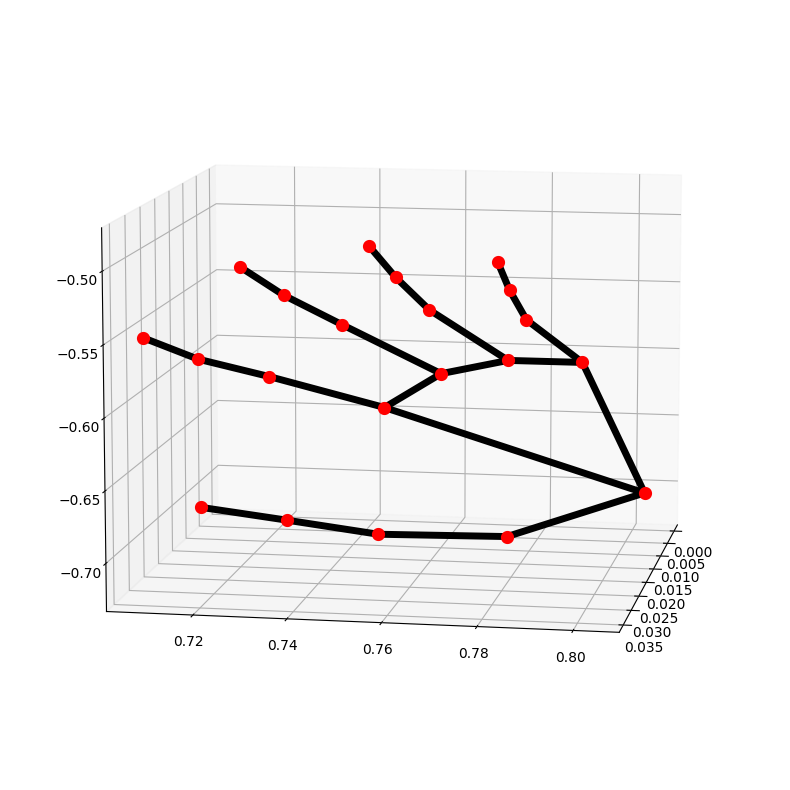

In [32]:
# 在三维坐标系中可视化索引为0的手
mpDraw.plot_landmarks(results.multi_hand_landmarks[0], mp_hands.HAND_CONNECTIONS)

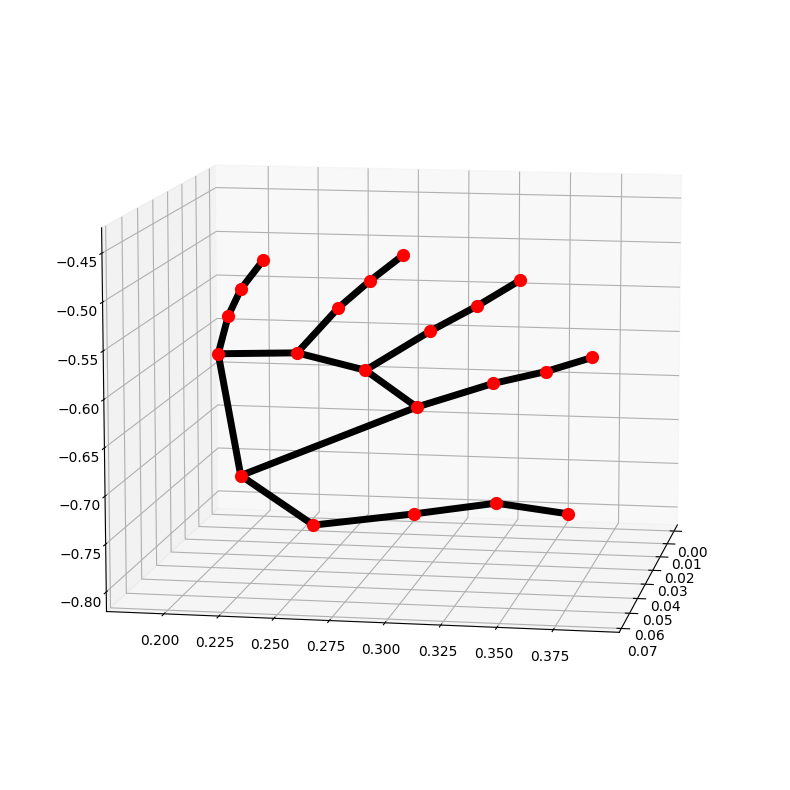

In [33]:
# 在三维坐标系中可视化索引为1的手
mpDraw.plot_landmarks(results.multi_hand_landmarks[1], mp_hands.HAND_CONNECTIONS)